In [110]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#put them in pairs by zipping them into lat_lngs
lat_lngs = zip(lats, lngs)
lat_lngs

In [112]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-71.30112806613943 -47.67170573421171
-78.22059885878956 96.71214396412063
88.04940218526613 163.07305479310025
70.14350870364629 169.56640712913696
0.2235304897882031 110.26670500120287
60.90248380855937 -90.10316724558649
81.0182727582322 9.245914983976093
78.84525056860991 116.17317460664265
52.174143824342764 -56.659455517151756
17.18840461679406 -106.97191617655984
-35.94093380768575 143.51986934871326
13.068171098862038 5.031608057909722
10.250477562598391 178.53773216225886
6.721603768883313 164.94359344215263
64.43823214893553 -28.98770989664723
53.665794882021885 -135.6616451508571
56.85037655967858 -44.31323480148012
82.46028696587027 46.63097842264932
-70.97080816216996 -151.57018767298092
-68.77148904353612 81.29737327562992
23.018569975315458 -97.396432606836
64.65287465019154 -20.26474503583424
-83.20672075079658 -39.67906746613926
-6.128835100151264 172.01357242820887
-47.30127050029469 -175.65214017598262
20.654911504719323 -83.33538670160988
83.05323552399005 73.942379

-44.94784016524972 -157.51238842227116
52.68710670454925 -72.61034176584509
75.87200129658191 -88.90865382275226
-61.74621720578341 -156.32426660002156
19.325975961409256 156.99983440626346
-51.51641512428595 173.3639342489069
-53.573285038023116 54.35398282148532
-84.18671550337625 155.63223185812
-12.883459522091002 -158.20794126534526
-54.49497722084691 -160.40777278478782
59.16244923896127 -178.8979560408297
-46.67858342036478 -150.09562665094035
-86.64245855200062 78.07572899418238
20.98514311516793 117.69260826720432
-16.647144028130086 -37.726477963164285
-12.25422999516094 -80.89248371034958
58.42091961112368 136.25241451509834
-81.92267560153455 -130.58781825219134
68.40061231078897 143.2649936741641
36.2676488957204 -65.61508506220345
-50.207003679935674 -49.63411941425599
-32.24719867926562 -151.6052170246358
50.8178925292477 119.75459728187599
46.47974953674873 -74.13262668834302
49.76701831359986 -125.99350808826969
41.09858047495695 -7.546854107554083
21.839479756126238 -

In [113]:
from citipy import citipy

In [114]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

636

In [115]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" +weather_api_key


In [116]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


    
 # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1   
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | cherskiy
Processing Record 4 of Set 1 | pevek
Processing Record 5 of Set 1 | pontianak
Processing Record 6 of Set 1 | thompson
Processing Record 7 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | saint anthony
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | swan hill
Processing Record 12 of Set 1 | sokoto
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | olafsvik
Processing Record 15 of Set 1 | sitka
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | nuevo progreso
Processing Record 21 of Set 1 | hella
Processing Recor

Processing Record 37 of Set 4 | barrow
Processing Record 38 of Set 4 | santa maria
Processing Record 39 of Set 4 | doka
Processing Record 40 of Set 4 | gat
Processing Record 41 of Set 4 | asilah
Processing Record 42 of Set 4 | zaragoza
Processing Record 43 of Set 4 | victoria
Processing Record 44 of Set 4 | bilibino
Processing Record 45 of Set 4 | balkhash
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | jian
Processing Record 48 of Set 4 | sarai
Processing Record 49 of Set 4 | touros
Processing Record 50 of Set 4 | saint-leu
Processing Record 1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 | rosarito
Processing Record 3 of Set 5 | north bend
Processing Record 4 of Set 5 | severo-kurilsk
Processing Record 5 of Set 5 | hermanus
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | kjollefjord
Processing Record 8 of Set 5 | ekibastuz
Processing Record 9 of Set 5 | omsukchan
Processing Record 10 of Set 5 | college
Processing Record 11

Processing Record 27 of Set 8 | strelka
Processing Record 28 of Set 8 | mokhsogollokh
Processing Record 29 of Set 8 | cerrito
Processing Record 30 of Set 8 | kahului
Processing Record 31 of Set 8 | buchanan
Processing Record 32 of Set 8 | ciudad bolivar
Processing Record 33 of Set 8 | cheuskiny
City not found. Skipping...
Processing Record 34 of Set 8 | galesong
Processing Record 35 of Set 8 | lesnoy
Processing Record 36 of Set 8 | chumikan
Processing Record 37 of Set 8 | senno
Processing Record 38 of Set 8 | dombarovskiy
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | bolu
Processing Record 41 of Set 8 | kibre mengist
Processing Record 42 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | yirol
City not found. Skipping...
Processing Record 45 of Set 8 | birjand
Processing Record 46 of Set 8 | koutiala
Processing Record 47 of Set 8 | luang prabang
Processing Record 48 of Set 8 | naukot

Processing Record 15 of Set 12 | bur gabo
City not found. Skipping...
Processing Record 16 of Set 12 | mecca
Processing Record 17 of Set 12 | obo
Processing Record 18 of Set 12 | talara
Processing Record 19 of Set 12 | lorengau
Processing Record 20 of Set 12 | dwarka
Processing Record 21 of Set 12 | carmen
Processing Record 22 of Set 12 | podor
Processing Record 23 of Set 12 | yumen
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | te anau
Processing Record 26 of Set 12 | mandali
Processing Record 27 of Set 12 | mancio lima
Processing Record 28 of Set 12 | joshimath
Processing Record 29 of Set 12 | lugovoy
Processing Record 30 of Set 12 | shahr-e kord
Processing Record 31 of Set 12 | ilulissat
Processing Record 32 of Set 12 | nguiu
City not found. Skipping...
Processing Record 33 of Set 12 | naze
Processing Record 34 of Set 12 | cabuyaro
Processing Record 35 of Set 12 | bonavista
Processing Record 36 of Set 12 | santuario
Processing Record 37 of Set 1

In [30]:
len(city_data)

578

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,40.66,75,20,4.61,AR,2022-08-20 20:48:22
1,Albany,42.6001,-73.9662,92.05,36,64,3.00,US,2022-08-20 20:51:00
2,Cherskiy,68.7500,161.3000,60.53,48,7,15.73,RU,2022-08-20 20:51:17
3,Pevek,69.7008,170.3133,47.88,59,2,15.66,RU,2022-08-20 20:51:17
4,Pontianak,-0.0333,109.3333,75.18,100,100,2.30,ID,2022-08-20 20:51:18
5,Thompson,55.7435,-97.8558,84.36,39,75,17.27,CA,2022-08-20 20:51:18
6,Saskylakh,71.9167,114.0833,35.10,93,97,6.33,RU,2022-08-20 20:51:19
7,Saint Anthony,45.0205,-93.2180,76.93,74,100,14.97,US,2022-08-20 20:51:19
8,San Patricio,28.0170,-97.5169,94.17,53,35,16.67,US,2022-08-20 20:51:20
9,Swan Hill,-35.3378,143.5544,38.61,76,4,3.40,AU,2022-08-20 20:51:20


In [32]:
#Re-order columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2022-08-20 20:48:22,-54.8000,-68.3000,40.66,75,20,4.61
1,Albany,US,2022-08-20 20:51:00,42.6001,-73.9662,92.05,36,64,3.00
2,Cherskiy,RU,2022-08-20 20:51:17,68.7500,161.3000,60.53,48,7,15.73
3,Pevek,RU,2022-08-20 20:51:17,69.7008,170.3133,47.88,59,2,15.66
4,Pontianak,ID,2022-08-20 20:51:18,-0.0333,109.3333,75.18,100,100,2.30
5,Thompson,CA,2022-08-20 20:51:18,55.7435,-97.8558,84.36,39,75,17.27
6,Saskylakh,RU,2022-08-20 20:51:19,71.9167,114.0833,35.10,93,97,6.33
7,Saint Anthony,US,2022-08-20 20:51:19,45.0205,-93.2180,76.93,74,100,14.97
8,San Patricio,US,2022-08-20 20:51:20,28.0170,-97.5169,94.17,53,35,16.67
9,Swan Hill,AU,2022-08-20 20:51:20,-35.3378,143.5544,38.61,76,4,3.40


In [33]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(r"C:\\users\mother\uofoclass\mod6\cities.csv", index_label="City_ID")

In [117]:
city_data_df = pd.read_csv('cities.csv')
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2022-08-15 06:10:33,-33.6500,115.3333,63.46,79,70,20.02
1,1,Lebu,CL,2022-08-15 06:10:34,-37.6167,-73.6500,44.37,78,25,7.96
2,2,Atuona,PF,2022-08-15 06:10:34,-9.8000,-139.0333,77.25,75,1,19.84
3,3,Ginda,IN,2022-08-15 06:10:35,30.6945,78.4932,65.61,92,100,5.30
4,4,Nikolskoye,RU,2022-08-15 06:10:35,59.7035,30.7861,72.88,62,5,3.83


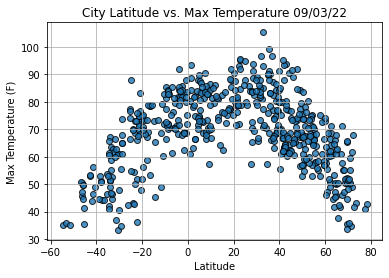

In [118]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
#plt.scatter(Lat, Max Temp, 
#plt.scatter(x="Lat", y='Max Temp', 
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

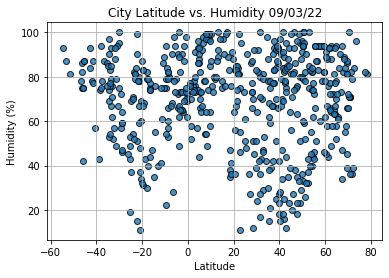

In [119]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig2.png")

# Show plot.
plt.show()

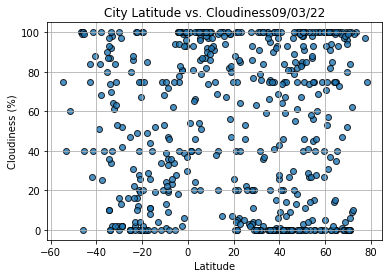

In [120]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig3.png")

# Show plot.
plt.show()

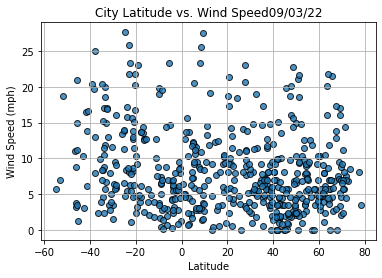

In [121]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig4.png")

# Show plot.
plt.show()

In [122]:
print(type('Lat'))

<class 'str'>


In [123]:
print(type(42))

<class 'int'>


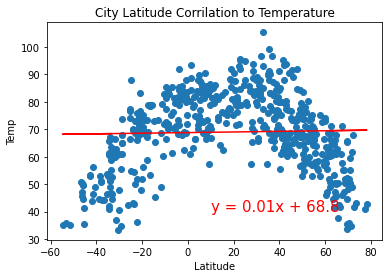

In [124]:

# Perform linear regression.
slope, intercept, r_value, p_value, std_err = stats.linregress(city_data_df['Lat'], city_data_df['Max Temp'])

# Calculate the regression line "y values" from the slope and intercept.
regress_values = (city_data_df['Lat']) * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(city_data_df['Lat'],regress_values,"r")

# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, xy=(10,40), fontsize=15, color="red")
         
plt.title("City Latitude Corrilation to Temperature")
         
plt.ylabel("Temp")
         
plt.xlabel("Latitude") 
         
plt.show()

In [125]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Tuatapere
Country                        NZ
Date          2022-08-15 06:10:38
Lat                      -46.1333
Lng                      167.6833
Max Temp                    45.54
Humidity                       82
Cloudiness                    100
Wind Speed                   3.71
Name: 13, dtype: object

In [126]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3       True
4       True
       ...  
541    False
542     True
543     True
544     True
545     True
Name: Lat, Length: 546, dtype: bool

In [127]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Ginda,IN,2022-08-15 06:10:35,30.6945,78.4932,65.61,92,100,5.30
4,4,Nikolskoye,RU,2022-08-15 06:10:35,59.7035,30.7861,72.88,62,5,3.83
5,5,Abha,SA,2022-08-15 06:05:59,18.2164,42.5053,77.25,38,99,9.22
6,6,Dikson,RU,2022-08-15 06:10:36,73.5069,80.5464,43.09,96,100,8.46
10,10,Saskylakh,RU,2022-08-15 06:10:37,71.9167,114.0833,61.59,36,9,7.54


In [129]:
# Linear regression on the Northern Hemisphere
# x_values = northern_hemi_df["Lat"]
# y_values = northern_hemi_df["Max Temp"]
# Call the function.
# plot_linear_regression(x_values, y_values,
#                       'Linear Regression on the Northern Hemisphere \
#                        for Maximum Temperature', 'Max Temp',(10,40))

NameError: name 'plot_linear_regression' is not defined

In [130]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    
    
    

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, xy=(text_coordinates), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [132]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                    Tuatapere
Country                        NZ
Date          2022-08-15 06:10:38
Lat                      -46.1333
Lng                      167.6833
Max Temp                    45.54
Humidity                       82
Cloudiness                    100
Wind Speed                   3.71
Name: 13, dtype: object

In [133]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [134]:
northern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,3,Ginda,IN,2022-08-15 06:10:35,30.6945,78.4932,65.61,92,100,5.30
4,4,Nikolskoye,RU,2022-08-15 06:10:35,59.7035,30.7861,72.88,62,5,3.83
5,5,Abha,SA,2022-08-15 06:05:59,18.2164,42.5053,77.25,38,99,9.22
6,6,Dikson,RU,2022-08-15 06:10:36,73.5069,80.5464,43.09,96,100,8.46
10,10,Saskylakh,RU,2022-08-15 06:10:37,71.9167,114.0833,61.59,36,9,7.54


In [135]:
southern_hemi_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2022-08-15 06:10:33,-33.6500,115.3333,63.46,79,70,20.02
1,1,Lebu,CL,2022-08-15 06:10:34,-37.6167,-73.6500,44.37,78,25,7.96
2,2,Atuona,PF,2022-08-15 06:10:34,-9.8000,-139.0333,77.25,75,1,19.84
7,7,Port Elizabeth,ZA,2022-08-15 06:10:36,-33.9180,25.5701,51.31,83,87,17.00
8,8,Ushuaia,AR,2022-08-15 06:09:32,-54.8000,-68.3000,35.26,93,75,5.75


In [147]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


SyntaxError: EOL while scanning string literal (Temp/ipykernel_11512/3016898122.py, line 6)

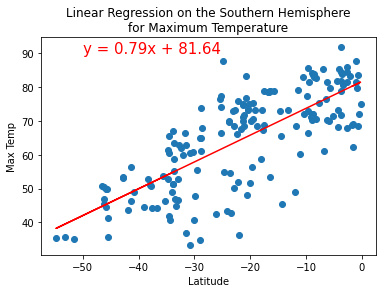

In [150]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature'
                        , 'Max Temp',(-50,90))

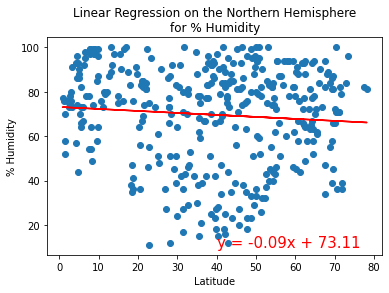

In [151]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

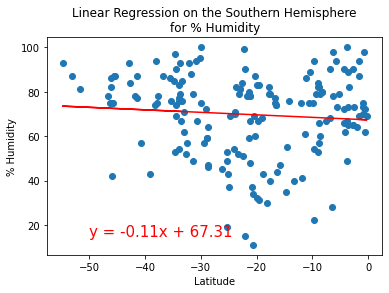

In [152]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

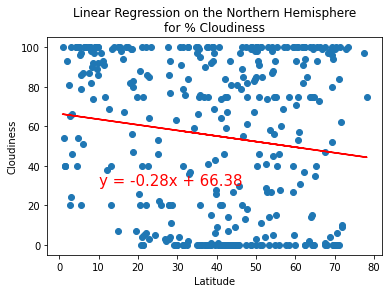

In [153]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', 'Cloudiness',(10,30))

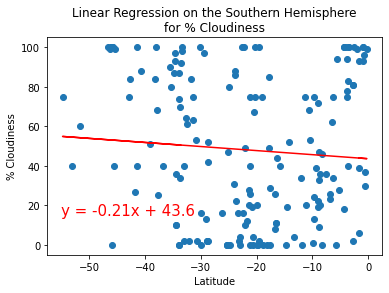

In [154]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-55,15))

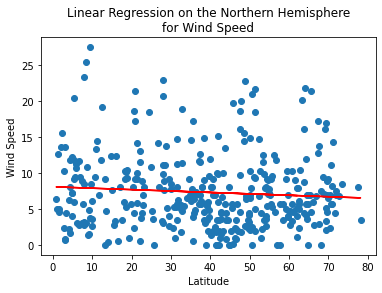

In [155]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

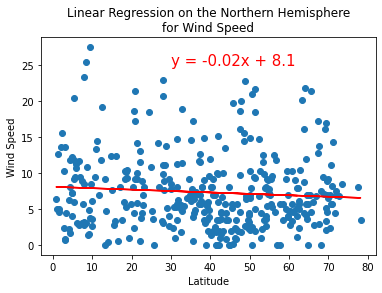

In [157]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(30,25))

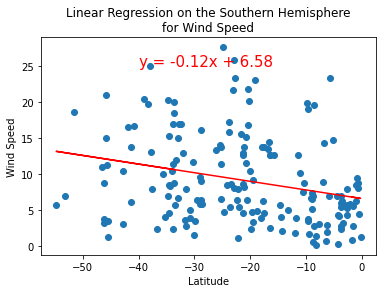

In [158]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-40,25))